<a href="https://colab.research.google.com/github/protechanalysis/Protectorate-streamlit/blob/main/claim_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/food_claims_CLEAN.csv")

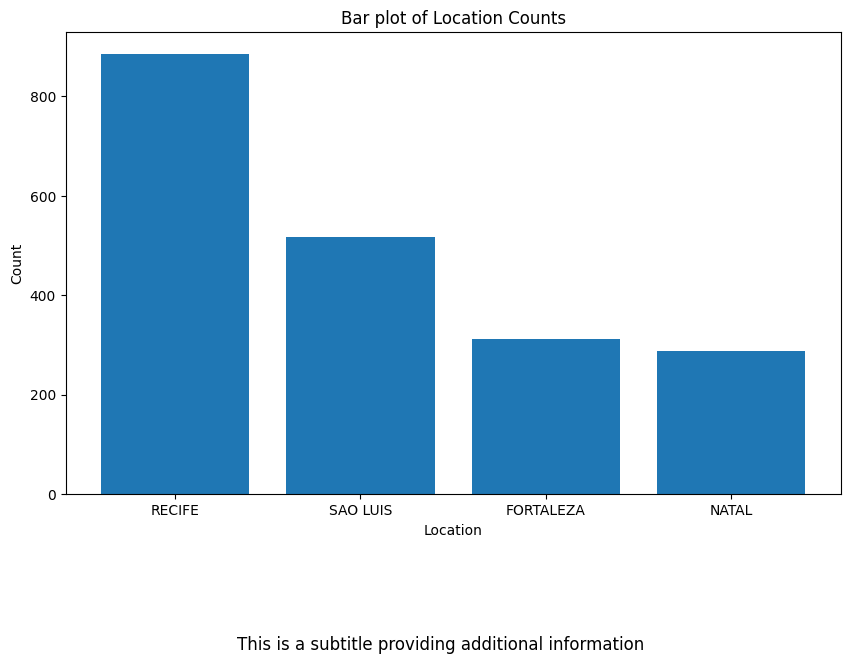

In [19]:
f = data['location'].value_counts().reset_index()
f.columns = ['location', 'n']

# Equivalent of ggplot(f, aes(x=location, y = n)) +
#               geom_col() +
#               labs(title = "Boxplot of Location Counts",
#                    y = "Count")

plt.figure(figsize=(10, 6))
plt.bar(f['location'], f['n'])
plt.title("Bar plot of Location Counts")
plt.text(0.5, -0.15, "This is a subtitle providing additional information",
         horizontalalignment='center', fontsize=12, transform=plt.gcf().transFigure)
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

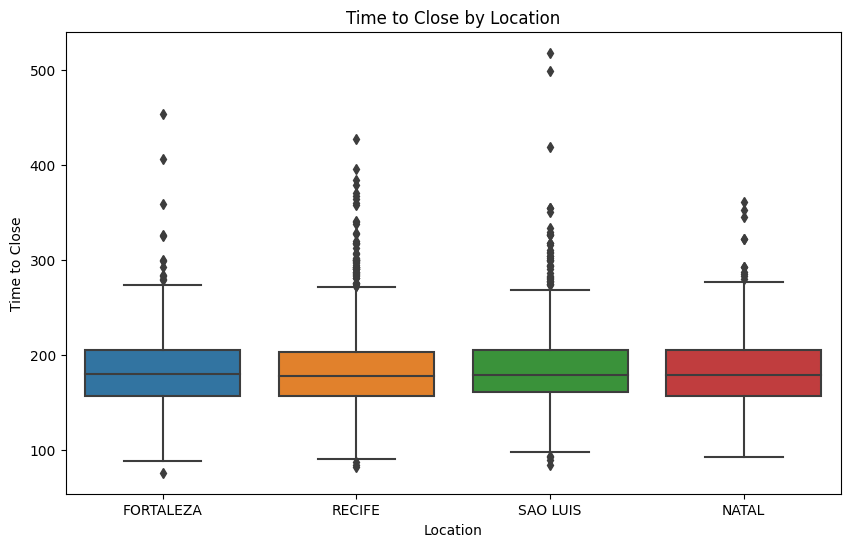

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data, x='location', y='time_to_close')
plt.title("Time to Close by Location")
plt.xlabel("Location")
plt.ylabel("Time to Close")
plt.show()

In [14]:
summary_df = data.groupby('location')['time_to_close'].agg(
    median='median',
    min='min',
    max='max',
    q1=lambda x: x.quantile(0.25),
    q2=lambda x: x.quantile(0.75)
).reset_index()

summary_df['iqr'] = summary_df['q2'] - summary_df['q1']
summary_df

,location,median,min,max,q1,q2,iqr
0,FORTALEZA,180.0,76,453,157.0,205.5,48.5
1,NATAL,179.0,93,361,157.0,205.5,48.5
2,RECIFE,178.0,82,427,157.0,203.0,46.0
3,SAO LUIS,179.0,84,518,161.0,205.0,44.0


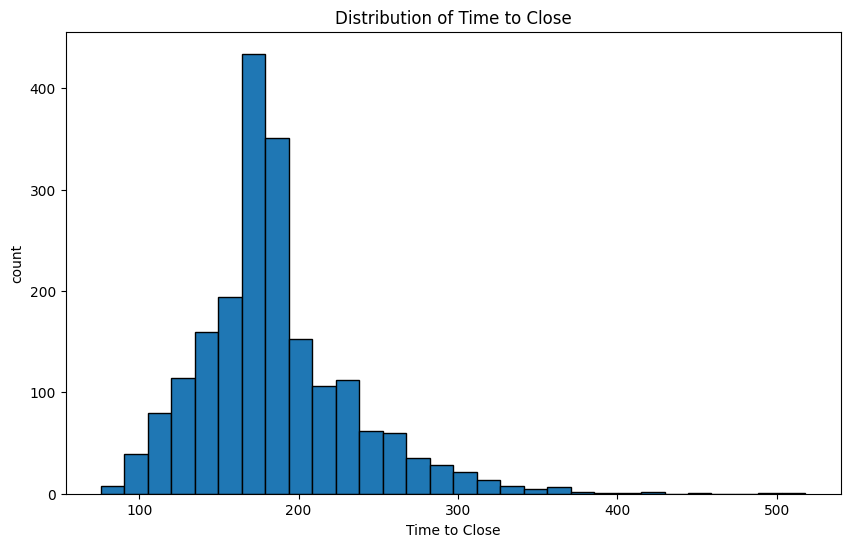

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['time_to_close'], bins=30, edgecolor='k')
plt.title("Distribution of Time to Close")
plt.xlabel("Time to Close")
plt.ylabel("count")
plt.show()